# S&P 500 Stock Movement Prediction using Deep Learning

Stock market, now 25 Trillion, is one pivotal player in US economy. Predicting stock returns, using either company’s financials or quantitative factors, has been considerd one of the most challenging and rewarding work, due to the noise and volatile features of the time series [1]. In the past decades, both academia and industries have done extensive studies using machine-learning models to predict financial time series, such as support vector machine [2], and neural network [3]. In this project, we would like to attempt to predict stocks returns with cutting-edge technology in deep learning.

<br>

GitHub repository link: https://github.com/rahulkgup/SP500-Stock-Movement-Prediction-using-CNN

In [1]:
import os
import csv
import time
import numpy as np
import pandas as pd
import functools as ft
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## It’s all about data

### Market Data (Downloaded)

To avoid the cost (primarily in terms of money) of downloading market indices at the run-time, we have already downloaded the historical data of around 30 years for S&P500 indices.  

To download all the market data we need for our training and testing for this model, we have used <a id='https://intrinio.com/'>Intrinio.com</a>, a Financial Data Platform. 

Downloaded historical ticker data holds following columns:
DATE, OPEN, HIGH, LOW, CLOSE, VOLUME, EX_DIVIDEND, SPLIT_RATIO, ADJ_OPEN, ADJ_HIGH, ADJ_LOW, ADJ_CLOSE, ADJ_VOLUME, ADJ_FACTOR


Run the following cell to load the raw indices data of particular ticker's dataset. 

In [2]:
ticker = "jpm"

dirc = "data"
separator = "/"
path = dirc + separator + ticker + separator 

#with open(path + ticker.upper() + ".csv", 'r') as f:
    #raw_data = list(csv.reader(f, delimiter=';'))    
#print(raw_data[1:3])

df = pd.read_csv(path + ticker.upper() + ".csv")
df.head()

,,,,,,,,,RESULT_COUNT: 8654,PAGE_SIZE: 10000,CURRENT_PAGE: 1,TOTAL_PAGES: 1,API_CALL_CREDITS: 1
DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,EX_DIVIDEND,SPLIT_RATIO,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR
2018-04-27,109.55,110.1599,109.13,109.4,8642514.0,0.0,1.0,109.55,110.1599,109.13,109.4,8642514.0,1
2018-04-26,109.97,110.82,109.34,110.1,10297133.0,0.0,1.0,109.97,110.82,109.34,110.1,10297133.0,1
2018-04-25,110.27,110.53,108.6,109.99,13546110.0,0.0,1.0,110.27,110.53,108.6,109.99,13546110.0,1
2018-04-24,111.75,112.9,109.59,110.41,16452412.0,0.0,1.0,111.75,112.9,109.59,110.41,16452412.0,1


### Data Cleaning

For the model we will be using below information only: 

OPEN, HIGH, LOW, CLOSE, VOLUME, ADJ_OPEN, ADJ_HIGH, ADJ_LOW, ADJ_CLOSE, ADJ_VOLUME

So we'll be ignoring following features for training our model:

DATE, EX_DIVIDEND, SPLIT_RATIO, ADJ_FACTOR

In [3]:
ticker = "jpm2"

dirc = "data"
separator = "/"
path = dirc + separator + ticker + separator 

with open(path + ticker.upper() + ".csv", 'r') as f:
    raw_data = list(csv.reader(f, delimiter=';'))

features_removed = ['DATE','EX_DIVIDEND','SPLIT_RATIO','ADJ_FACTOR']
index_to_ignore = [0,6,7,13]  # corresponding indices of above features

df = pd.read_csv(path + ticker.upper() + ".csv")
df.drop(features_removed, axis=1).head()

,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME
0,109.55,110.1599,109.13,109.40,8642514.0,109.55,110.1599,109.13,109.40,8642514.0
1,109.97,110.8200,109.34,110.10,10297133.0,109.97,110.8200,109.34,110.10,10297133.0
2,110.27,110.5300,108.60,109.99,13546110.0,110.27,110.5300,108.60,109.99,13546110.0
3,111.75,112.9000,109.59,110.41,16452412.0,111.75,112.9000,109.59,110.41,16452412.0
4,111.57,111.9500,110.63,110.93,11285181.0,111.57,111.9500,110.63,110.93,11285181.0


### Data Loading

For the model we will be loading all the available data in a given directory that can be for a single stock, a particular sector or all S&P 500 tickers: 

In [4]:
def load_csv(fname, delimiter=","):
  data = np.genfromtxt(fname, delimiter=delimiter, skip_header=2)  
  data = np.delete(data, index_to_ignore, axis=1) 
  return data

# stock data loading
def load_stock_data(path, columns=10):
  print('Loading stocks data from dataset already downloaded from Intrinio.com')

  # read a directory of data
  stocks_set = np.zeros([0,columns])
  for dir_item in os.listdir(path):
    dir_item_path = os.path.join(path, dir_item)
    if os.path.isfile(dir_item_path):
      data = load_csv(dir_item_path)
      stocks_set = np.concatenate((stocks_set, data), axis=0)
 
  return stocks_set

# Import data
tic = time.time()
data = load_stock_data("data/jpm/")
toc = time.time()
print('Importing data took %fs' % (toc - tic))

Loading stocks data from dataset already downloaded from Intrinio.com
Importing data took 0.092820s


### Data Augmentation 

With data augmentation we are increasing the number of movement patterns. The more the data, the better model will be, at least in principle :)

Converting data into small set of matrix to make them similar (to the images like) one that we feed into CNN model. [4]

In [5]:
# Valutation Day 
T=0    # the day algorithm/model runs 

# Training for forcasting # of days in future/advance
stock_movement_on_day = T + 30
moving_window = 256
channels = 10

# process a data into input and label arrays
def data_preprocess(data, moving_window, stock_movement_on_day, columns):
  print('Preprocessing stocks data of few years will take a while, please stay tuned...')

  stock_set = np.zeros([0,moving_window,columns])
  label_set = np.zeros([0,2])
  for idx in range(data.shape[0] - (moving_window + stock_movement_on_day)):
    stock_set = np.concatenate((stock_set, np.expand_dims(data[range(idx, idx + (moving_window)), :], axis=0)), axis=0)

    if data[idx + (moving_window + stock_movement_on_day), 3] > data[idx + (moving_window), 3]:
      lbl = [[1.0, 0.0]]
    else:
      lbl = [[0.0, 1.0]]
    label_set = np.concatenate((label_set, lbl), axis=0)
  
  return stock_set, label_set

# Call data_preprocess
tic = time.time()
stocks_set, labels_set = data_preprocess(data, moving_window, stock_movement_on_day, channels)
toc = time.time()
print('Processing data took %fs' % (toc - tic))

Preprocessing stocks data of few years will take a while, please stay tuned...
Processing data took 513.966892s


### Normalize Time Series Data

Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1. Normalization can be useful as our stock data has input values with differing scales. 

For Normalization we need the feature wise minimum and maximum observable values from the . You may be able to estimate these values from your available data. 

However, if your time series is trending up or down, estimating these expected values may be difficult and normalization may not be the best method to use on your problem.

A value is normalized as follows:

y = (x - min) / (max - min)

Where the minimum and maximum values pertain to the value x being normalized.


In the cell below, we implement the normalize function to take in ticker's data, x, and return it as a normalized Numpy array. The return object should be the same shape as x.

In [6]:
# normalize the data
def normalize_data(stocks_set):
  stocks_set_ = np.zeros(stocks_set.shape)
  for i in range(len(stocks_set)):
    min = stocks_set[i].min(axis=0)
    max = stocks_set[i].max(axis=0)
    stocks_set_[i] = (stocks_set[i] - min) / (max - min)
  return stocks_set_

#normalize
stocks_set = normalize_data(stocks_set)

#print(stocks_set[0:1])

### Shuffle and Split the dataset

Now we will shuffle and the dataset split into training, validation, and testing datasets. Shuffling is useful in order to avoid any element of bias/patterns in the split datasets before training the ML model. One important concept though is that data need to be shuffled first before split and not the otherwise. This helps to prevent  prevent overfitting and provide tool for cross-validation.

In [7]:
# Spilt and shuffle

train_x, test_x, train_y, test_y = train_test_split(stocks_set, labels_set, test_size=0.3, shuffle=True)
test_x, val_x, test_y, val_y = train_test_split(test_x, test_y, test_size=0.5, shuffle=True)
  
print("Train shapes (x, y):", train_x.shape, train_y.shape)
print("Validation shapes (x, y):", val_x.shape, val_y.shape)
print("Test shapes (x, y):", test_x.shape, test_y.shape)  

Train shapes (x, y): (5857, 256, 10) (5857, 2)
Validation shapes (x, y): (1256, 256, 10) (1256, 2)
Test shapes (x, y): (1255, 256, 10) (1255, 2)


### Batches

Here is just a simple way to do batches. We've written it so that it includes all the data. Sometimes you'll throw out some data at the end to make sure you have full batches. Here we just extend the last batch to include the remaining data.

In [8]:
def get_batches(x, y, n_batches=10):
    """ Return a generator that yields batches from arrays x and y. """
    batch_size = len(x)//n_batches
    
    #print("batch_size:", batch_size)    
    for ii in range(0, n_batches*batch_size, batch_size):
        # If we're not on the last batch, grab data with size batch_size
        if ii != (n_batches-1)*batch_size:
            X, Y = x[ii: ii+batch_size], y[ii: ii+batch_size] 
        # On the last batch, grab the rest of the data
        else:
            X, Y = x[ii:], y[ii:]
        # I love generators
        yield X, Y

## Neural Net Layers

### Methods to define layers

Instead of convolving a 2D image, we convolved a 1D image, since stock data would be created as an 1D tensor. 

After several convolutional layers and batchnorms later, we arrive at a tensor sized [batch_size, 2, 1024], which we then run through several softmax layers and finally a sigmoid activation to result in a tensor sized [batch_size, 2], with two values, one representing the bullish confidence, and the other one the bearish confidence. [4]

In [9]:
def conv1d(input, output_dim,
           conv_w=9, conv_s=2,
           padding="SAME", name="conv1d",
           stddev=0.02, bias=True):
  with tf.variable_scope(name):
    w = tf.get_variable('w', [conv_w, input.get_shape().as_list()[-1], output_dim],
      initializer=tf.truncated_normal_initializer(stddev=stddev))
    c = tf.nn.conv1d(input, w, conv_s, padding=padding)

    if bias:
      b = tf.get_variable('b', [output_dim], initializer=tf.constant_initializer(0.0))
      return c + b

    return c

def batchnorm(input, name="batchnorm", is_2d=False):
  with tf.variable_scope(name):
    input = tf.identity(input)
    channels = input.get_shape()[-1]
    offset = tf.get_variable("offset", [channels],
                              dtype=tf.float32,
                              initializer=tf.zeros_initializer())
    scale = tf.get_variable("scale", [channels],
                            dtype=tf.float32,
                            initializer=tf.random_normal_initializer(1.0, 0.02))
    if is_2d:
      mean, variance = tf.nn.moments(input, axes=[0, 1, 2], keep_dims=False)
    else:
      mean, variance = tf.nn.moments(input, axes=[0, 1], keep_dims=False)
    variance_epsilon = 1e-5
    normalized = tf.nn.batch_normalization(input, mean, variance, offset, scale,
                                           variance_epsilon=variance_epsilon)
    return normalized

def max_pool(input, ksize=2, pool_stride=2, padding="SAME", name="max_pool"):
  with tf.variable_scope(name):
    return tf.nn.max_pool(
        input,
        ksize=[1,ksize,ksize,1],
        strides=[1,pool_stride,pool_stride,1],
        padding=padding)

def fully_connected(input, output_dim, name="fc", stddev=0.02):
  with tf.variable_scope(name):
    unfolded_dim = ft.reduce(lambda x, y: x*y, input.get_shape().as_list()[1:])
    w = tf.get_variable('w',
      [unfolded_dim, output_dim],
      initializer=tf.truncated_normal_initializer(stddev=stddev))
    b = tf.get_variable('b', [output_dim], initializer=tf.constant_initializer(0.0))
    input_flat = tf.reshape(input, [-1, unfolded_dim])

    return tf.matmul(input_flat, w) + b

def lrelu(x, a):
  with tf.name_scope("lrelu"):
    x = tf.identity(x)
    return (0.5 * (1 + a)) * x + (0.5 * (1 - a)) * tf.abs(x)

def relu(x, name="relu"):
  return tf.nn.relu(x)

### Model Class


In [10]:
class SP500_CNN:
  def __init__(self,
    image,
    label,
    dropout=0.5,
    filter_num=128):

    self.image = image
    self.label = label
    self.dropout = dropout
    self.filter_num = filter_num

  def build(self):
      #input image
      input_image = self.image

      layers = []

      # conv_1 
      with tf.variable_scope("conv_1"):
        output = relu(conv1d(input_image, self.filter_num, name='conv_1'))
        layers.append(output)

      # conv_2 - conv_8
      layer_specs = [
        (self.filter_num * 2, 0.5),  
        (self.filter_num * 4, 0.5),  
        (self.filter_num * 4, 0.5),   
        (self.filter_num * 8, 0.5),
        (self.filter_num * 8, 0.5),  
        (self.filter_num * 8, 0.5),  
        (self.filter_num * 8, 0.5)  
      ]

      # adding layers
      for _, (out_channels, dropout) in enumerate(layer_specs):
        with tf.variable_scope("conv_%d" % (len(layers) + 1)):
          rectified = lrelu(layers[-1], 0.2)

          # [batch, in_width, in_channels] 
          convolved = conv1d(rectified, out_channels)

          # batchnormalize convolved
          output = batchnorm(convolved, is_2d=False)

          # dropout
          if dropout > 0.0:
            output = tf.nn.dropout(output, keep_prob=1 - dropout)

          layers.append(output)

      #fc1
      h_fc1 = relu(fully_connected(layers[-1], 256, name='fc1'))

      #dropout
      h_fc1_drop = tf.nn.dropout(h_fc1, self.dropout)

      #fc2
      fc_layer = fully_connected(h_fc1_drop, 2, name='fc2')

      return fc_layer

### Intializing Variables

Here, we are initializing variable required during out training and testing


In [11]:
# Variables
epochs = 100
n_batches = 20
iteration = 0
lr_rate = 1e-3

# Reset graph
tf.reset_default_graph() 

# Construct graph
image = tf.placeholder(tf.float32, [None, moving_window, channels])
label = tf.placeholder(tf.float32, [None, 2])
dropout = tf.placeholder(tf.float32)

### Build/Instantiate Model

Method to build the model


In [12]:
model = SP500_CNN(image, label, dropout=dropout)
fcnet = model.build()

logits = tf.sigmoid(fcnet)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=label, logits=logits)
loss = tf.reduce_mean(cross_entropy) 

optimize = tf.train.AdamOptimizer(lr_rate).minimize(loss)

correct_prediction = tf.equal(tf.argmax(label, 1), tf.argmax(logits, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Training

Here, we'll train the network.

In [13]:
#Training
train_loss_hist = []
train_acc_history = []
val_loss_hist = []
val_acc_hist = []

saver = tf.train.Saver()
with tf.Session() as sess:
    tic = time.time()
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        for x, y in get_batches(train_x, train_y, n_batches):
            #print(x[0:1])
            feed = {image: x,
                    label: y,
                    dropout: 0.5}
            #print(e, x.shape, y.shape)
            train_loss, _ = sess.run([loss, optimize], feed_dict=feed)
            train_loss_hist.append(train_loss)
            train_accuracy = sess.run(accuracy, {image: val_x, label: val_y, dropout: 1.0})
            train_acc_history.append(train_accuracy)
            #acc_hist.append(acc)
            print("Epoch: {}/{}".format(e+1, epochs),
                  "Iteration: {}".format(iteration),
                  "Training loss: {:.5f}".format(train_loss),
                  "Train Acc: {:.5f}".format(train_accuracy))
            iteration += 1
            
            
            if iteration % 5 == 0:
                #val_loss = sess.run(loss, feed_dict=feed)
                #val_loss_hist.append(val_loss)
                feed = {image: val_x,
                        label: val_y,
                        dropout: 1.0}
                val_acc = sess.run(accuracy, feed_dict=feed)
                val_acc_hist.append(val_acc)                
                print("Epoch: {}/{}".format(e+1, epochs),
                      "Iteration: {}".format(iteration),
                      #"Training loss: {:.5f}".format(val_loss),
                      "Validation Acc: {:.4f}".format(val_acc))
    #print(val_acc_hist)
    toc = time.time()
    print('That took %fs' % (toc - tic))
    saver.save(sess, "checkpoints/ticker.ckpt")

Epoch: 1/100 Iteration: 0 Training loss: 0.69531 Train Acc: 0.50717
Epoch: 1/100 Iteration: 1 Training loss: 0.69419 Train Acc: 0.52070
Epoch: 1/100 Iteration: 2 Training loss: 0.69318 Train Acc: 0.53264
Epoch: 1/100 Iteration: 3 Training loss: 0.68380 Train Acc: 0.53264
Epoch: 1/100 Iteration: 4 Training loss: 0.68664 Train Acc: 0.54618
Epoch: 1/100 Iteration: 5 Validation Acc: 0.5581
Epoch: 1/100 Iteration: 5 Training loss: 0.68372 Train Acc: 0.55414
Epoch: 1/100 Iteration: 6 Training loss: 0.68860 Train Acc: 0.56449
Epoch: 1/100 Iteration: 7 Training loss: 0.69068 Train Acc: 0.59395
Epoch: 1/100 Iteration: 8 Training loss: 0.70314 Train Acc: 0.57245
Epoch: 1/100 Iteration: 9 Training loss: 0.68094 Train Acc: 0.54538
Epoch: 1/100 Iteration: 10 Validation Acc: 0.5549
Epoch: 1/100 Iteration: 10 Training loss: 0.68183 Train Acc: 0.56529
Epoch: 1/100 Iteration: 11 Training loss: 0.66903 Train Acc: 0.58121
Epoch: 1/100 Iteration: 12 Training loss: 0.67178 Train Acc: 0.54299
Epoch: 1/100 I

Epoch: 6/100 Iteration: 105 Training loss: 0.56207 Train Acc: 0.72213
Epoch: 6/100 Iteration: 106 Training loss: 0.57529 Train Acc: 0.72134
Epoch: 6/100 Iteration: 107 Training loss: 0.60054 Train Acc: 0.71656
Epoch: 6/100 Iteration: 108 Training loss: 0.59794 Train Acc: 0.72452
Epoch: 6/100 Iteration: 109 Training loss: 0.58790 Train Acc: 0.71497
Epoch: 6/100 Iteration: 110 Validation Acc: 0.7205
Epoch: 6/100 Iteration: 110 Training loss: 0.57174 Train Acc: 0.71576
Epoch: 6/100 Iteration: 111 Training loss: 0.56656 Train Acc: 0.71656
Epoch: 6/100 Iteration: 112 Training loss: 0.57201 Train Acc: 0.71576
Epoch: 6/100 Iteration: 113 Training loss: 0.58247 Train Acc: 0.71815
Epoch: 6/100 Iteration: 114 Training loss: 0.56248 Train Acc: 0.71975
Epoch: 6/100 Iteration: 115 Validation Acc: 0.7269
Epoch: 6/100 Iteration: 115 Training loss: 0.56231 Train Acc: 0.73089
Epoch: 6/100 Iteration: 116 Training loss: 0.58782 Train Acc: 0.72452
Epoch: 6/100 Iteration: 117 Training loss: 0.58712 Train A

Epoch: 11/100 Iteration: 208 Training loss: 0.53297 Train Acc: 0.75955
Epoch: 11/100 Iteration: 209 Training loss: 0.55699 Train Acc: 0.75318
Epoch: 11/100 Iteration: 210 Validation Acc: 0.7556
Epoch: 11/100 Iteration: 210 Training loss: 0.53382 Train Acc: 0.75398
Epoch: 11/100 Iteration: 211 Training loss: 0.50969 Train Acc: 0.75000
Epoch: 11/100 Iteration: 212 Training loss: 0.52123 Train Acc: 0.74443
Epoch: 11/100 Iteration: 213 Training loss: 0.52428 Train Acc: 0.73248
Epoch: 11/100 Iteration: 214 Training loss: 0.54555 Train Acc: 0.72532
Epoch: 11/100 Iteration: 215 Validation Acc: 0.7357
Epoch: 11/100 Iteration: 215 Training loss: 0.55578 Train Acc: 0.73328
Epoch: 11/100 Iteration: 216 Training loss: 0.55326 Train Acc: 0.73885
Epoch: 11/100 Iteration: 217 Training loss: 0.52192 Train Acc: 0.75080
Epoch: 11/100 Iteration: 218 Training loss: 0.54238 Train Acc: 0.75159
Epoch: 11/100 Iteration: 219 Training loss: 0.52676 Train Acc: 0.75318
Epoch: 11/100 Iteration: 220 Validation Acc:

Epoch: 16/100 Iteration: 309 Training loss: 0.51319 Train Acc: 0.78742
Epoch: 16/100 Iteration: 310 Validation Acc: 0.7962
Epoch: 16/100 Iteration: 310 Training loss: 0.49784 Train Acc: 0.79936
Epoch: 16/100 Iteration: 311 Training loss: 0.48717 Train Acc: 0.80653
Epoch: 16/100 Iteration: 312 Training loss: 0.46670 Train Acc: 0.80334
Epoch: 16/100 Iteration: 313 Training loss: 0.49068 Train Acc: 0.79857
Epoch: 16/100 Iteration: 314 Training loss: 0.49709 Train Acc: 0.77627
Epoch: 16/100 Iteration: 315 Validation Acc: 0.7803
Epoch: 16/100 Iteration: 315 Training loss: 0.48728 Train Acc: 0.78822
Epoch: 16/100 Iteration: 316 Training loss: 0.53257 Train Acc: 0.76752
Epoch: 16/100 Iteration: 317 Training loss: 0.51195 Train Acc: 0.76752
Epoch: 16/100 Iteration: 318 Training loss: 0.51254 Train Acc: 0.76433
Epoch: 16/100 Iteration: 319 Training loss: 0.51575 Train Acc: 0.76990
Epoch: 16/100 Iteration: 320 Validation Acc: 0.7803
Epoch: 17/100 Iteration: 320 Training loss: 0.52702 Train Acc: 

Epoch: 21/100 Iteration: 410 Training loss: 0.46210 Train Acc: 0.81768
Epoch: 21/100 Iteration: 411 Training loss: 0.47740 Train Acc: 0.80334
Epoch: 21/100 Iteration: 412 Training loss: 0.46572 Train Acc: 0.80494
Epoch: 21/100 Iteration: 413 Training loss: 0.47269 Train Acc: 0.80892
Epoch: 21/100 Iteration: 414 Training loss: 0.47284 Train Acc: 0.80096
Epoch: 21/100 Iteration: 415 Validation Acc: 0.8169
Epoch: 21/100 Iteration: 415 Training loss: 0.48180 Train Acc: 0.80096
Epoch: 21/100 Iteration: 416 Training loss: 0.50340 Train Acc: 0.80494
Epoch: 21/100 Iteration: 417 Training loss: 0.44586 Train Acc: 0.80971
Epoch: 21/100 Iteration: 418 Training loss: 0.46276 Train Acc: 0.80971
Epoch: 21/100 Iteration: 419 Training loss: 0.47381 Train Acc: 0.81290
Epoch: 21/100 Iteration: 420 Validation Acc: 0.8018
Epoch: 22/100 Iteration: 420 Training loss: 0.47959 Train Acc: 0.81529
Epoch: 22/100 Iteration: 421 Training loss: 0.45740 Train Acc: 0.80971
Epoch: 22/100 Iteration: 422 Training loss: 

Epoch: 26/100 Iteration: 511 Training loss: 0.43392 Train Acc: 0.80414
Epoch: 26/100 Iteration: 512 Training loss: 0.45280 Train Acc: 0.80175
Epoch: 26/100 Iteration: 513 Training loss: 0.43574 Train Acc: 0.80096
Epoch: 26/100 Iteration: 514 Training loss: 0.44868 Train Acc: 0.81369
Epoch: 26/100 Iteration: 515 Validation Acc: 0.8217
Epoch: 26/100 Iteration: 515 Training loss: 0.46419 Train Acc: 0.81051
Epoch: 26/100 Iteration: 516 Training loss: 0.48274 Train Acc: 0.81847
Epoch: 26/100 Iteration: 517 Training loss: 0.44392 Train Acc: 0.82166
Epoch: 26/100 Iteration: 518 Training loss: 0.44208 Train Acc: 0.82245
Epoch: 26/100 Iteration: 519 Training loss: 0.44097 Train Acc: 0.82882
Epoch: 26/100 Iteration: 520 Validation Acc: 0.8185
Epoch: 27/100 Iteration: 520 Training loss: 0.46438 Train Acc: 0.82006
Epoch: 27/100 Iteration: 521 Training loss: 0.45505 Train Acc: 0.80892
Epoch: 27/100 Iteration: 522 Training loss: 0.44806 Train Acc: 0.82166
Epoch: 27/100 Iteration: 523 Training loss: 

Epoch: 31/100 Iteration: 612 Training loss: 0.43930 Train Acc: 0.82245
Epoch: 31/100 Iteration: 613 Training loss: 0.42390 Train Acc: 0.83599
Epoch: 31/100 Iteration: 614 Training loss: 0.47449 Train Acc: 0.83201
Epoch: 31/100 Iteration: 615 Validation Acc: 0.8408
Epoch: 31/100 Iteration: 615 Training loss: 0.44567 Train Acc: 0.83758
Epoch: 31/100 Iteration: 616 Training loss: 0.44456 Train Acc: 0.83997
Epoch: 31/100 Iteration: 617 Training loss: 0.44033 Train Acc: 0.84076
Epoch: 31/100 Iteration: 618 Training loss: 0.43253 Train Acc: 0.83758
Epoch: 31/100 Iteration: 619 Training loss: 0.42604 Train Acc: 0.83041
Epoch: 31/100 Iteration: 620 Validation Acc: 0.8376
Epoch: 32/100 Iteration: 620 Training loss: 0.45574 Train Acc: 0.82564
Epoch: 32/100 Iteration: 621 Training loss: 0.46268 Train Acc: 0.84475
Epoch: 32/100 Iteration: 622 Training loss: 0.43935 Train Acc: 0.82803
Epoch: 32/100 Iteration: 623 Training loss: 0.43427 Train Acc: 0.83838
Epoch: 32/100 Iteration: 624 Training loss: 

Epoch: 36/100 Iteration: 713 Training loss: 0.41638 Train Acc: 0.85908
Epoch: 36/100 Iteration: 714 Training loss: 0.42488 Train Acc: 0.85828
Epoch: 36/100 Iteration: 715 Validation Acc: 0.8487
Epoch: 36/100 Iteration: 715 Training loss: 0.44438 Train Acc: 0.84952
Epoch: 36/100 Iteration: 716 Training loss: 0.47398 Train Acc: 0.85589
Epoch: 36/100 Iteration: 717 Training loss: 0.41655 Train Acc: 0.85032
Epoch: 36/100 Iteration: 718 Training loss: 0.42215 Train Acc: 0.84076
Epoch: 36/100 Iteration: 719 Training loss: 0.42986 Train Acc: 0.84873
Epoch: 36/100 Iteration: 720 Validation Acc: 0.8567
Epoch: 37/100 Iteration: 720 Training loss: 0.43484 Train Acc: 0.85271
Epoch: 37/100 Iteration: 721 Training loss: 0.44359 Train Acc: 0.85111
Epoch: 37/100 Iteration: 722 Training loss: 0.39823 Train Acc: 0.84315
Epoch: 37/100 Iteration: 723 Training loss: 0.42113 Train Acc: 0.84952
Epoch: 37/100 Iteration: 724 Training loss: 0.41567 Train Acc: 0.85271
Epoch: 37/100 Iteration: 725 Validation Acc:

Epoch: 41/100 Iteration: 814 Training loss: 0.42852 Train Acc: 0.85271
Epoch: 41/100 Iteration: 815 Validation Acc: 0.8495
Epoch: 41/100 Iteration: 815 Training loss: 0.43960 Train Acc: 0.85191
Epoch: 41/100 Iteration: 816 Training loss: 0.45028 Train Acc: 0.83280
Epoch: 41/100 Iteration: 817 Training loss: 0.43062 Train Acc: 0.85111
Epoch: 41/100 Iteration: 818 Training loss: 0.44009 Train Acc: 0.85191
Epoch: 41/100 Iteration: 819 Training loss: 0.41721 Train Acc: 0.85987
Epoch: 41/100 Iteration: 820 Validation Acc: 0.8575
Epoch: 42/100 Iteration: 820 Training loss: 0.41794 Train Acc: 0.85987
Epoch: 42/100 Iteration: 821 Training loss: 0.44403 Train Acc: 0.85589
Epoch: 42/100 Iteration: 822 Training loss: 0.41535 Train Acc: 0.86226
Epoch: 42/100 Iteration: 823 Training loss: 0.41556 Train Acc: 0.85350
Epoch: 42/100 Iteration: 824 Training loss: 0.40995 Train Acc: 0.85430
Epoch: 42/100 Iteration: 825 Validation Acc: 0.8583
Epoch: 42/100 Iteration: 825 Training loss: 0.44272 Train Acc: 

Epoch: 46/100 Iteration: 915 Training loss: 0.42639 Train Acc: 0.84076
Epoch: 46/100 Iteration: 916 Training loss: 0.43213 Train Acc: 0.83997
Epoch: 46/100 Iteration: 917 Training loss: 0.42529 Train Acc: 0.84236
Epoch: 46/100 Iteration: 918 Training loss: 0.43643 Train Acc: 0.85111
Epoch: 46/100 Iteration: 919 Training loss: 0.41525 Train Acc: 0.84793
Epoch: 46/100 Iteration: 920 Validation Acc: 0.8471
Epoch: 47/100 Iteration: 920 Training loss: 0.44602 Train Acc: 0.85510
Epoch: 47/100 Iteration: 921 Training loss: 0.44777 Train Acc: 0.85191
Epoch: 47/100 Iteration: 922 Training loss: 0.42833 Train Acc: 0.84793
Epoch: 47/100 Iteration: 923 Training loss: 0.43615 Train Acc: 0.85111
Epoch: 47/100 Iteration: 924 Training loss: 0.40388 Train Acc: 0.85350
Epoch: 47/100 Iteration: 925 Validation Acc: 0.8535
Epoch: 47/100 Iteration: 925 Training loss: 0.41000 Train Acc: 0.85669
Epoch: 47/100 Iteration: 926 Training loss: 0.45737 Train Acc: 0.86385
Epoch: 47/100 Iteration: 927 Training loss: 

Epoch: 51/100 Iteration: 1016 Training loss: 0.44900 Train Acc: 0.86465
Epoch: 51/100 Iteration: 1017 Training loss: 0.41228 Train Acc: 0.86465
Epoch: 51/100 Iteration: 1018 Training loss: 0.38955 Train Acc: 0.85350
Epoch: 51/100 Iteration: 1019 Training loss: 0.42439 Train Acc: 0.86146
Epoch: 51/100 Iteration: 1020 Validation Acc: 0.8559
Epoch: 52/100 Iteration: 1020 Training loss: 0.42114 Train Acc: 0.86624
Epoch: 52/100 Iteration: 1021 Training loss: 0.43343 Train Acc: 0.87022
Epoch: 52/100 Iteration: 1022 Training loss: 0.40691 Train Acc: 0.86863
Epoch: 52/100 Iteration: 1023 Training loss: 0.42176 Train Acc: 0.86146
Epoch: 52/100 Iteration: 1024 Training loss: 0.39730 Train Acc: 0.87580
Epoch: 52/100 Iteration: 1025 Validation Acc: 0.8527
Epoch: 52/100 Iteration: 1025 Training loss: 0.44291 Train Acc: 0.86067
Epoch: 52/100 Iteration: 1026 Training loss: 0.42725 Train Acc: 0.86385
Epoch: 52/100 Iteration: 1027 Training loss: 0.42983 Train Acc: 0.87022
Epoch: 52/100 Iteration: 1028 

Epoch: 56/100 Iteration: 1116 Training loss: 0.41338 Train Acc: 0.86545
Epoch: 56/100 Iteration: 1117 Training loss: 0.42333 Train Acc: 0.86067
Epoch: 56/100 Iteration: 1118 Training loss: 0.39308 Train Acc: 0.86545
Epoch: 56/100 Iteration: 1119 Training loss: 0.40124 Train Acc: 0.86465
Epoch: 56/100 Iteration: 1120 Validation Acc: 0.8662
Epoch: 57/100 Iteration: 1120 Training loss: 0.40689 Train Acc: 0.86783
Epoch: 57/100 Iteration: 1121 Training loss: 0.42173 Train Acc: 0.86704
Epoch: 57/100 Iteration: 1122 Training loss: 0.40631 Train Acc: 0.87500
Epoch: 57/100 Iteration: 1123 Training loss: 0.40915 Train Acc: 0.87102
Epoch: 57/100 Iteration: 1124 Training loss: 0.38743 Train Acc: 0.87182
Epoch: 57/100 Iteration: 1125 Validation Acc: 0.8694
Epoch: 57/100 Iteration: 1125 Training loss: 0.42895 Train Acc: 0.86704
Epoch: 57/100 Iteration: 1126 Training loss: 0.41858 Train Acc: 0.86783
Epoch: 57/100 Iteration: 1127 Training loss: 0.39853 Train Acc: 0.86704
Epoch: 57/100 Iteration: 1128 

Epoch: 61/100 Iteration: 1216 Training loss: 0.43881 Train Acc: 0.86545
Epoch: 61/100 Iteration: 1217 Training loss: 0.39943 Train Acc: 0.88217
Epoch: 61/100 Iteration: 1218 Training loss: 0.40718 Train Acc: 0.87341
Epoch: 61/100 Iteration: 1219 Training loss: 0.38010 Train Acc: 0.88057
Epoch: 61/100 Iteration: 1220 Validation Acc: 0.8702
Epoch: 62/100 Iteration: 1220 Training loss: 0.41957 Train Acc: 0.86624
Epoch: 62/100 Iteration: 1221 Training loss: 0.41601 Train Acc: 0.88296
Epoch: 62/100 Iteration: 1222 Training loss: 0.38592 Train Acc: 0.88137
Epoch: 62/100 Iteration: 1223 Training loss: 0.40868 Train Acc: 0.87580
Epoch: 62/100 Iteration: 1224 Training loss: 0.38925 Train Acc: 0.87102
Epoch: 62/100 Iteration: 1225 Validation Acc: 0.8774
Epoch: 62/100 Iteration: 1225 Training loss: 0.41261 Train Acc: 0.87978
Epoch: 62/100 Iteration: 1226 Training loss: 0.41276 Train Acc: 0.87182
Epoch: 62/100 Iteration: 1227 Training loss: 0.40464 Train Acc: 0.87182
Epoch: 62/100 Iteration: 1228 

Epoch: 66/100 Iteration: 1316 Training loss: 0.42213 Train Acc: 0.85748
Epoch: 66/100 Iteration: 1317 Training loss: 0.43071 Train Acc: 0.86146
Epoch: 66/100 Iteration: 1318 Training loss: 0.40196 Train Acc: 0.86704
Epoch: 66/100 Iteration: 1319 Training loss: 0.39699 Train Acc: 0.86385
Epoch: 66/100 Iteration: 1320 Validation Acc: 0.8686
Epoch: 67/100 Iteration: 1320 Training loss: 0.41029 Train Acc: 0.86943
Epoch: 67/100 Iteration: 1321 Training loss: 0.41728 Train Acc: 0.87261
Epoch: 67/100 Iteration: 1322 Training loss: 0.38930 Train Acc: 0.87022
Epoch: 67/100 Iteration: 1323 Training loss: 0.39951 Train Acc: 0.87022
Epoch: 67/100 Iteration: 1324 Training loss: 0.38419 Train Acc: 0.87022
Epoch: 67/100 Iteration: 1325 Validation Acc: 0.8790
Epoch: 67/100 Iteration: 1325 Training loss: 0.40592 Train Acc: 0.87500
Epoch: 67/100 Iteration: 1326 Training loss: 0.42988 Train Acc: 0.86465
Epoch: 67/100 Iteration: 1327 Training loss: 0.39031 Train Acc: 0.87261
Epoch: 67/100 Iteration: 1328 

Epoch: 71/100 Iteration: 1416 Training loss: 0.42205 Train Acc: 0.86306
Epoch: 71/100 Iteration: 1417 Training loss: 0.39937 Train Acc: 0.88057
Epoch: 71/100 Iteration: 1418 Training loss: 0.39227 Train Acc: 0.87261
Epoch: 71/100 Iteration: 1419 Training loss: 0.38882 Train Acc: 0.87420
Epoch: 71/100 Iteration: 1420 Validation Acc: 0.8615
Epoch: 72/100 Iteration: 1420 Training loss: 0.39054 Train Acc: 0.85748
Epoch: 72/100 Iteration: 1421 Training loss: 0.41799 Train Acc: 0.86067
Epoch: 72/100 Iteration: 1422 Training loss: 0.38935 Train Acc: 0.88137
Epoch: 72/100 Iteration: 1423 Training loss: 0.42807 Train Acc: 0.86943
Epoch: 72/100 Iteration: 1424 Training loss: 0.38092 Train Acc: 0.87500
Epoch: 72/100 Iteration: 1425 Validation Acc: 0.8686
Epoch: 72/100 Iteration: 1425 Training loss: 0.42483 Train Acc: 0.87420
Epoch: 72/100 Iteration: 1426 Training loss: 0.42438 Train Acc: 0.87659
Epoch: 72/100 Iteration: 1427 Training loss: 0.38833 Train Acc: 0.88137
Epoch: 72/100 Iteration: 1428 

Epoch: 76/100 Iteration: 1516 Training loss: 0.42677 Train Acc: 0.88376
Epoch: 76/100 Iteration: 1517 Training loss: 0.39475 Train Acc: 0.88217
Epoch: 76/100 Iteration: 1518 Training loss: 0.39635 Train Acc: 0.88535
Epoch: 76/100 Iteration: 1519 Training loss: 0.38078 Train Acc: 0.87818
Epoch: 76/100 Iteration: 1520 Validation Acc: 0.8750
Epoch: 77/100 Iteration: 1520 Training loss: 0.38106 Train Acc: 0.87898
Epoch: 77/100 Iteration: 1521 Training loss: 0.43093 Train Acc: 0.88296
Epoch: 77/100 Iteration: 1522 Training loss: 0.39094 Train Acc: 0.87978
Epoch: 77/100 Iteration: 1523 Training loss: 0.39652 Train Acc: 0.88615
Epoch: 77/100 Iteration: 1524 Training loss: 0.37779 Train Acc: 0.88057
Epoch: 77/100 Iteration: 1525 Validation Acc: 0.8734
Epoch: 77/100 Iteration: 1525 Training loss: 0.41331 Train Acc: 0.88535
Epoch: 77/100 Iteration: 1526 Training loss: 0.42665 Train Acc: 0.87739
Epoch: 77/100 Iteration: 1527 Training loss: 0.40791 Train Acc: 0.87341
Epoch: 77/100 Iteration: 1528 

Epoch: 81/100 Iteration: 1616 Training loss: 0.40144 Train Acc: 0.88455
Epoch: 81/100 Iteration: 1617 Training loss: 0.40723 Train Acc: 0.89013
Epoch: 81/100 Iteration: 1618 Training loss: 0.38071 Train Acc: 0.88694
Epoch: 81/100 Iteration: 1619 Training loss: 0.37184 Train Acc: 0.88296
Epoch: 81/100 Iteration: 1620 Validation Acc: 0.8869
Epoch: 82/100 Iteration: 1620 Training loss: 0.39079 Train Acc: 0.87898
Epoch: 82/100 Iteration: 1621 Training loss: 0.41739 Train Acc: 0.87739
Epoch: 82/100 Iteration: 1622 Training loss: 0.39538 Train Acc: 0.89013
Epoch: 82/100 Iteration: 1623 Training loss: 0.39189 Train Acc: 0.88057
Epoch: 82/100 Iteration: 1624 Training loss: 0.38022 Train Acc: 0.88217
Epoch: 82/100 Iteration: 1625 Validation Acc: 0.8838
Epoch: 82/100 Iteration: 1625 Training loss: 0.40159 Train Acc: 0.87659
Epoch: 82/100 Iteration: 1626 Training loss: 0.43283 Train Acc: 0.87341
Epoch: 82/100 Iteration: 1627 Training loss: 0.38178 Train Acc: 0.87818
Epoch: 82/100 Iteration: 1628 

Epoch: 86/100 Iteration: 1716 Training loss: 0.41576 Train Acc: 0.88774
Epoch: 86/100 Iteration: 1717 Training loss: 0.39691 Train Acc: 0.88535
Epoch: 86/100 Iteration: 1718 Training loss: 0.38811 Train Acc: 0.87818
Epoch: 86/100 Iteration: 1719 Training loss: 0.39664 Train Acc: 0.87659
Epoch: 86/100 Iteration: 1720 Validation Acc: 0.8830
Epoch: 87/100 Iteration: 1720 Training loss: 0.39260 Train Acc: 0.87978
Epoch: 87/100 Iteration: 1721 Training loss: 0.42786 Train Acc: 0.88535
Epoch: 87/100 Iteration: 1722 Training loss: 0.38832 Train Acc: 0.87818
Epoch: 87/100 Iteration: 1723 Training loss: 0.40199 Train Acc: 0.87500
Epoch: 87/100 Iteration: 1724 Training loss: 0.38518 Train Acc: 0.88057
Epoch: 87/100 Iteration: 1725 Validation Acc: 0.8766
Epoch: 87/100 Iteration: 1725 Training loss: 0.42131 Train Acc: 0.89172
Epoch: 87/100 Iteration: 1726 Training loss: 0.42912 Train Acc: 0.88217
Epoch: 87/100 Iteration: 1727 Training loss: 0.39478 Train Acc: 0.88615
Epoch: 87/100 Iteration: 1728 

Epoch: 91/100 Iteration: 1816 Training loss: 0.41484 Train Acc: 0.89172
Epoch: 91/100 Iteration: 1817 Training loss: 0.39511 Train Acc: 0.89252
Epoch: 91/100 Iteration: 1818 Training loss: 0.38835 Train Acc: 0.88615
Epoch: 91/100 Iteration: 1819 Training loss: 0.37757 Train Acc: 0.89331
Epoch: 91/100 Iteration: 1820 Validation Acc: 0.8877
Epoch: 92/100 Iteration: 1820 Training loss: 0.39734 Train Acc: 0.88694
Epoch: 92/100 Iteration: 1821 Training loss: 0.37438 Train Acc: 0.88535
Epoch: 92/100 Iteration: 1822 Training loss: 0.37220 Train Acc: 0.88774
Epoch: 92/100 Iteration: 1823 Training loss: 0.38288 Train Acc: 0.89331
Epoch: 92/100 Iteration: 1824 Training loss: 0.37738 Train Acc: 0.89490
Epoch: 92/100 Iteration: 1825 Validation Acc: 0.8941
Epoch: 92/100 Iteration: 1825 Training loss: 0.42463 Train Acc: 0.89172
Epoch: 92/100 Iteration: 1826 Training loss: 0.40694 Train Acc: 0.89650
Epoch: 92/100 Iteration: 1827 Training loss: 0.37559 Train Acc: 0.89172
Epoch: 92/100 Iteration: 1828 

Epoch: 96/100 Iteration: 1916 Training loss: 0.42961 Train Acc: 0.87898
Epoch: 96/100 Iteration: 1917 Training loss: 0.37862 Train Acc: 0.87978
Epoch: 96/100 Iteration: 1918 Training loss: 0.38322 Train Acc: 0.87261
Epoch: 96/100 Iteration: 1919 Training loss: 0.40429 Train Acc: 0.87898
Epoch: 96/100 Iteration: 1920 Validation Acc: 0.8790
Epoch: 97/100 Iteration: 1920 Training loss: 0.38434 Train Acc: 0.89331
Epoch: 97/100 Iteration: 1921 Training loss: 0.41140 Train Acc: 0.87420
Epoch: 97/100 Iteration: 1922 Training loss: 0.38577 Train Acc: 0.87978
Epoch: 97/100 Iteration: 1923 Training loss: 0.39096 Train Acc: 0.87261
Epoch: 97/100 Iteration: 1924 Training loss: 0.36945 Train Acc: 0.87818
Epoch: 97/100 Iteration: 1925 Validation Acc: 0.8790
Epoch: 97/100 Iteration: 1925 Training loss: 0.39992 Train Acc: 0.88137
Epoch: 97/100 Iteration: 1926 Training loss: 0.40662 Train Acc: 0.87182
Epoch: 97/100 Iteration: 1927 Training loss: 0.37273 Train Acc: 0.88376
Epoch: 97/100 Iteration: 1928 

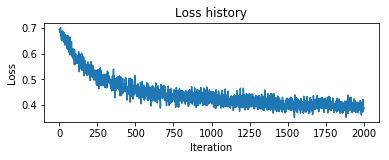

In [14]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_loss_hist)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

### Testing

Below you see the test accuracy. You can also see the predictions returned for images.

In [15]:
iteration = 0
test_acc_history = []
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    for e in range(epochs):  
        #print(e)
        for x, y in get_batches(test_x, test_y, n_batches):
            if iteration % 5 == 0:
                feed = {image: x,
                        label: y,
                        dropout: 1.0}
                test_acc = sess.run(accuracy, feed_dict=feed)
                test_acc_history.append(test_acc)
                #print("Test accuracy: {:.4f}".format(test_acc))
                print("Epoch: {}/{}".format(e+1, epochs),
                      "Iteration: {}".format(iteration),
                      #"Training loss: {:.5f}".format(val_loss),
                      "Test Acc: {:.4f}".format(test_acc))
            iteration += 1
           
#print(test_acc_history)
print("test finished")

INFO:tensorflow:Restoring parameters from checkpoints/ticker.ckpt
Epoch: 1/100 Iteration: 0 Test Acc: 0.8871
Epoch: 1/100 Iteration: 5 Test Acc: 0.9194
Epoch: 1/100 Iteration: 10 Test Acc: 0.9032
Epoch: 1/100 Iteration: 15 Test Acc: 0.8710
Epoch: 2/100 Iteration: 20 Test Acc: 0.8548
Epoch: 2/100 Iteration: 25 Test Acc: 0.9355
Epoch: 2/100 Iteration: 30 Test Acc: 0.9032
Epoch: 2/100 Iteration: 35 Test Acc: 0.8226
Epoch: 3/100 Iteration: 40 Test Acc: 0.8871
Epoch: 3/100 Iteration: 45 Test Acc: 0.8871
Epoch: 3/100 Iteration: 50 Test Acc: 0.8871
Epoch: 3/100 Iteration: 55 Test Acc: 0.8387
Epoch: 4/100 Iteration: 60 Test Acc: 0.8710
Epoch: 4/100 Iteration: 65 Test Acc: 0.9355
Epoch: 4/100 Iteration: 70 Test Acc: 0.9032
Epoch: 4/100 Iteration: 75 Test Acc: 0.8548
Epoch: 5/100 Iteration: 80 Test Acc: 0.8226
Epoch: 5/100 Iteration: 85 Test Acc: 0.8871
Epoch: 5/100 Iteration: 90 Test Acc: 0.8710
Epoch: 5/100 Iteration: 95 Test Acc: 0.8226
Epoch: 6/100 Iteration: 100 Test Acc: 0.9032
Epoch: 6/10

Epoch: 48/100 Iteration: 950 Test Acc: 0.9032
Epoch: 48/100 Iteration: 955 Test Acc: 0.7903
Epoch: 49/100 Iteration: 960 Test Acc: 0.8387
Epoch: 49/100 Iteration: 965 Test Acc: 0.9355
Epoch: 49/100 Iteration: 970 Test Acc: 0.9032
Epoch: 49/100 Iteration: 975 Test Acc: 0.8548
Epoch: 50/100 Iteration: 980 Test Acc: 0.8871
Epoch: 50/100 Iteration: 985 Test Acc: 0.9194
Epoch: 50/100 Iteration: 990 Test Acc: 0.9194
Epoch: 50/100 Iteration: 995 Test Acc: 0.8548
Epoch: 51/100 Iteration: 1000 Test Acc: 0.8548
Epoch: 51/100 Iteration: 1005 Test Acc: 0.8871
Epoch: 51/100 Iteration: 1010 Test Acc: 0.9032
Epoch: 51/100 Iteration: 1015 Test Acc: 0.8710
Epoch: 52/100 Iteration: 1020 Test Acc: 0.8871
Epoch: 52/100 Iteration: 1025 Test Acc: 0.8871
Epoch: 52/100 Iteration: 1030 Test Acc: 0.8871
Epoch: 52/100 Iteration: 1035 Test Acc: 0.8548
Epoch: 53/100 Iteration: 1040 Test Acc: 0.8387
Epoch: 53/100 Iteration: 1045 Test Acc: 0.9032
Epoch: 53/100 Iteration: 1050 Test Acc: 0.9355
Epoch: 53/100 Iteration

Epoch: 96/100 Iteration: 1900 Test Acc: 0.8387
Epoch: 96/100 Iteration: 1905 Test Acc: 0.9194
Epoch: 96/100 Iteration: 1910 Test Acc: 0.8871
Epoch: 96/100 Iteration: 1915 Test Acc: 0.8710
Epoch: 97/100 Iteration: 1920 Test Acc: 0.8710
Epoch: 97/100 Iteration: 1925 Test Acc: 0.9194
Epoch: 97/100 Iteration: 1930 Test Acc: 0.8710
Epoch: 97/100 Iteration: 1935 Test Acc: 0.8710
Epoch: 98/100 Iteration: 1940 Test Acc: 0.8387
Epoch: 98/100 Iteration: 1945 Test Acc: 0.9032
Epoch: 98/100 Iteration: 1950 Test Acc: 0.8548
Epoch: 98/100 Iteration: 1955 Test Acc: 0.8548
Epoch: 99/100 Iteration: 1960 Test Acc: 0.8710
Epoch: 99/100 Iteration: 1965 Test Acc: 0.9032
Epoch: 99/100 Iteration: 1970 Test Acc: 0.9355
Epoch: 99/100 Iteration: 1975 Test Acc: 0.8226
Epoch: 100/100 Iteration: 1980 Test Acc: 0.8548
Epoch: 100/100 Iteration: 1985 Test Acc: 0.9032
Epoch: 100/100 Iteration: 1990 Test Acc: 0.9032
Epoch: 100/100 Iteration: 1995 Test Acc: 0.8710
test finished


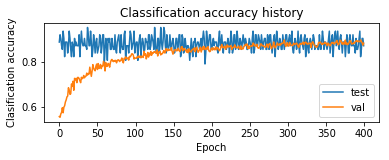

In [16]:
plt.subplot(2, 1, 2)
plt.plot(test_acc_history, label='test')
plt.plot(val_acc_hist, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

## References

[1]	Bao. W, Yue. J, Rao. Y PLoS ONE 12(7): e0180944. https://doi.org/10.1371/journal.pone.0180944. 

[2]	Huang. W, Nakamori. Y, Wang. SY Computers & Operations Research. 2005; 32(10):2513–22. 

[3]	Moghaddam. A, Moghaddam. M, Esfandyarica. M, Journal of Economics, Finance and Administrative Science (2016). https://doi.org/10.1016/j.jefas.2016.07.002. 

[4] Philip Xu's Blog; 2017; https://github.com/philipxjm/Convolutional-Neural-Stock-Market-Technical-Analyser